In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt


import warnings
warnings.filterwarnings("ignore")

# Load the data

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Checking the BloodPressure data Skew or not

In [4]:
df.BloodPressure.skew()

-1.8436079833551302

**Observation**
- its negative so,its not skewed

### Statistical measure for the BloodPressure column

In [5]:
print("Mean value of BloodPressure:",round(df.BloodPressure.mean(),2))
print("Median value of BloodPressure:",round(df.BloodPressure.median(),2))
print("Minimum value of BloodPressure:",round(df.BloodPressure.min(),2))
print("Maximum value of BloodPressure",round(df.BloodPressure.max(),2))
print("StandardDivation value of BloodPressure:",round(df.BloodPressure.std(),2))

Mean value of BloodPressure: 69.11
Median value of BloodPressure: 72.0
Minimum value of BloodPressure: 0
Maximum value of BloodPressure 122
StandardDivation value of BloodPressure: 19.36


**Observation**
- The minimum value of BloodPressure is Zero that not possible so its outliers

### calculating the upper and lower limits to detects the outliers

- Lower Bound: (Q1 - 1.5 * IQR)
- Upper Bound: (Q3 + 1.5 * IQR)
- IQR = Q3 - Q1

In [6]:
Q3=df.BloodPressure.quantile(.75)
Q1=df.BloodPressure.quantile(.25)
IQR=Q3-Q1

In [7]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [8]:
print("Lower limit is:",lower_limit)
print("Upper limit is:",upper_limit)

Lower limit is: 35.0
Upper limit is: 107.0


### count the values which are above the upper and below the lower limit

In [9]:
len(df[(df['BloodPressure'] > upper_limit) | (df['BloodPressure'] < lower_limit)])

45

In [10]:
#its a big number if removed it will be bad for model training, so will modify them

#creating another column in the dataframe to load the modified value of bloodpressure and ploting the values, if any problem occured we will
#drop the new column and treat the outliers again by using original columns value

#blood pressure 0 not possible because BloodPressure 0 means the body is dead
#minimum 60-70 can be consideres as normal blood pressure, so replacing it with the mean of blood pressure

In [11]:
bp_mean=df.BloodPressure.mean()
df["BloodPressureModified"]=np.where(
                                df.BloodPressure>upper_limit,bp_mean,
                                np.where(
                                df.BloodPressure<lower_limit,bp_mean,
                                df.BloodPressure))

In [12]:
pd.DataFrame(df.BloodPressureModified.describe().T)

,BloodPressureModified
count,768.000000
mean,72.027013
std,11.170450
min,38.000000
25%,64.000000
50%,72.000000
75%,80.000000
max,106.000000


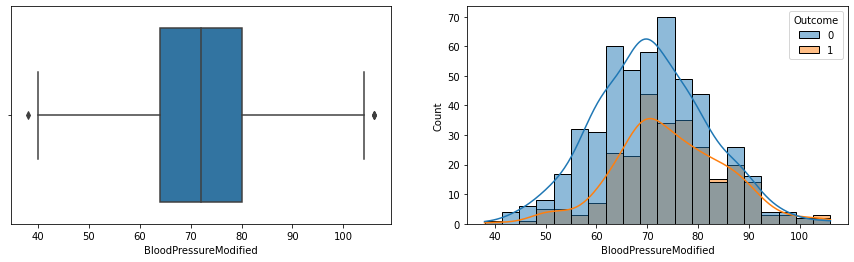

In [13]:
#ploting the bloodpressure modified column to check the outliers
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='BloodPressureModified', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="BloodPressureModified",kde=True)

plt.show()

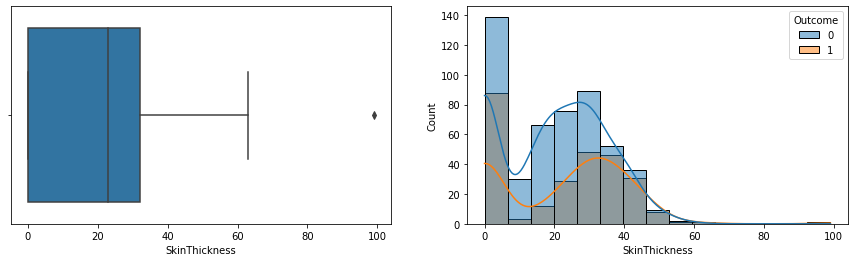

In [14]:
#ploting the SkinThickness modified column to check the outliers
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.boxplot(x='SkinThickness', data=df)

plt.subplot(1,2,2)
sns.histplot(data=df, hue='Outcome', x="SkinThickness",kde=True)

plt.show()

In [15]:
df.SkinThickness.skew()

0.10937249648187608

Lower Bound: (Q1 - 1.5 * IQR)
Upper Bound: (Q3 + 1.5 * IQR)
IQR = Q3 - Q1

In [25]:
#we remove the outliers using IQR technique
Q3=df.SkinThickness.quantile(.75)
Q1=df.SkinThickness.quantile(.25)
IQR=Q3-Q1


In [27]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [30]:
print("Lower limit is:",lower_limit)
print("Upper limit is:",upper_limit)

Lower limit is: -48.0
Upper limit is: 80.0
